 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports"
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = 'whale_returns.csv'
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
null_count = whale_returns_df.isnull().sum()

# Print nulls
print(null_count)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
null_count = whale_returns_df.dropna(inplace=True)


In [5]:
# Print nulls
print(null_count)

None


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = 'algo_returns.csv'
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Check Dtypes

algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [8]:
# Count nulls
null_count = algo_returns_df.isnull().sum()

# Print nulls
print(null_count)

Algo 1    0
Algo 2    6
dtype: int64


In [9]:
# Drop nulls
null_count = algo_returns_df.dropna(inplace=True)

In [10]:
# Print dropped nulls
print(null_count)

None


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
# Reading S&P 500 Closing Prices
sp500_history = 'Sp500_history.csv'
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace(",","").astype("float")
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [14]:
# Calculate Daily Returns
sp500_history_df["Sp500_Daily_return"] = sp500_history_df ["Close"].pct_change()

In [15]:
# Drop nulls
sp500_history_df.dropna(inplace=True)
sp500_history_df.head()

,Close,Sp500_Daily_return
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df = sp500_history_df.drop(columns = 'Close')


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_returns_df,algo_returns_df,sp500_history_df], axis="columns", join="inner")
combined_df = combined_df.sort_index()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

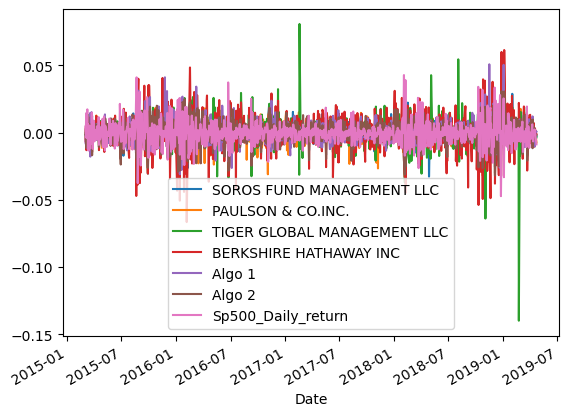

In [18]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

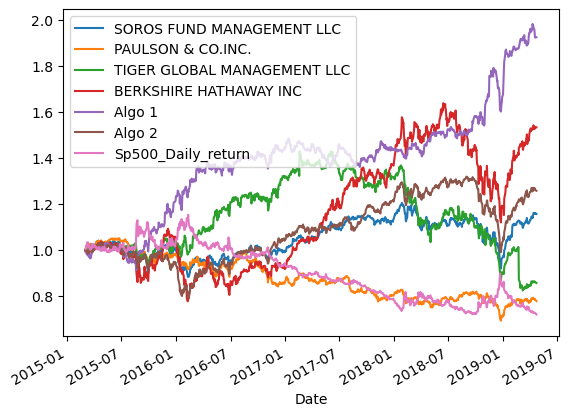

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_return.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

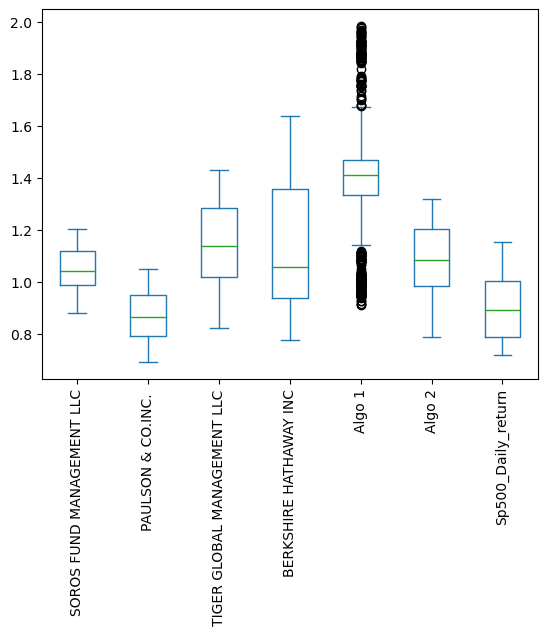

In [20]:
# Box plot to visually show risk
cumulative_return.plot.box(rot = 90)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()

#daily_std.head()

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
daily_std.head(7)
# Determine which portfolios are riskier than the S&P 500


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Sp500_Daily_return             0.008587
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = daily_std * np.sqrt(252)
anual_std.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

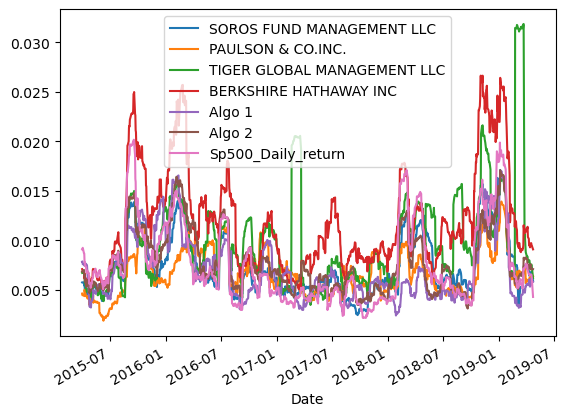

In [24]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window = 21).std().plot()



### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation_matrix = combined_df.corr()
# Display de correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
Sp500_Daily_return                            0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.16411

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

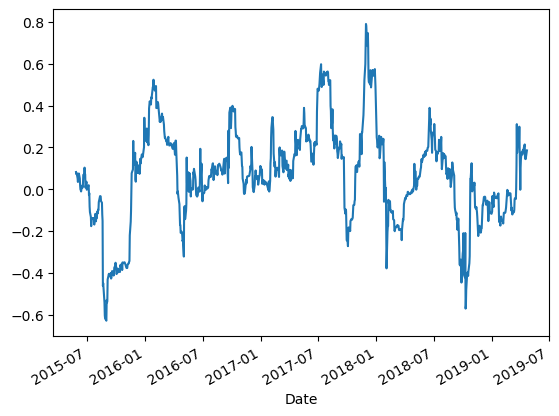

In [26]:
# Calculate covariance of a single portfolio
covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['Sp500_Daily_return'])
# Calculate variance of S&P 500
variance = combined_df['Sp500_Daily_return'].rolling(window=60).var()
# Computing beta
sp500_beta = covariance / variance
# Plot beta trend
sp500_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

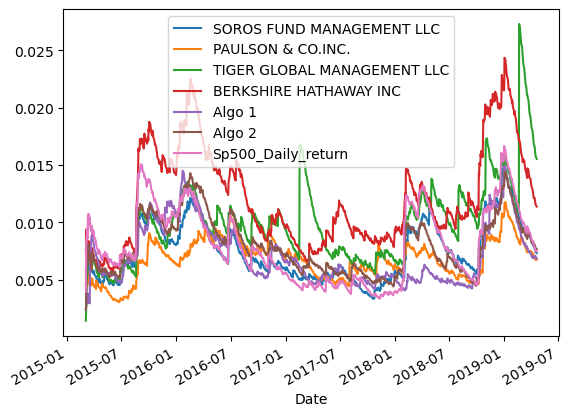

In [27]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharp_ratio = combined_df.mean()*252 / combined_df.std()*np.sqrt(252)

<Axes: >

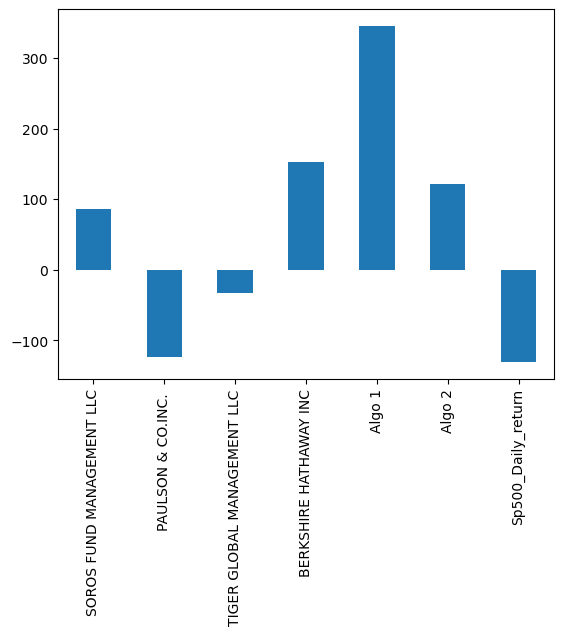

In [29]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 definitley outpreforms the market adn Algo 2 also outperforms it but not to the extent as Algo 1

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated


## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
ET = 'ET.csv'
ET = pd.read_csv(ET, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop unnecessary columns
ET = ET.drop(columns = ['Open', 'High', 'Low','Adj Close', 'Volume'])
ET = ET.rename(columns = {'Close' : 'ET'})

ET.head()

,ET
Date,
2023-02-02,13.28
2023-02-03,13.28
2023-02-06,12.98
2023-02-07,12.85
2023-02-08,12.78


In [31]:
# Reading data from 2nd stock
KO = 'KO.csv'
KO = pd.read_csv(KO, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Rename and Drop unnecessary columns
KO = KO.drop(columns = ['Open', 'High', 'Low','Adj Close', 'Volume'])
KO = KO.rename(columns = {'Close' : 'KO'})

KO.head()

,KO
Date,
2023-02-02,60.279999
2023-02-03,59.830002
2023-02-06,60.169998
2023-02-07,60.070000
2023-02-08,59.720001


In [32]:
# Reading data from 3rd stock
SPCE = 'SPCE.csv'
SPCE = pd.read_csv(SPCE, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop unnecessary columns
SPCE = SPCE.drop(columns = ['Open', 'High', 'Low','Adj Close', 'Volume'])
SPCE = SPCE.rename(columns = {'Close' : 'SPCE'})

SPCE.head()


,SPCE
Date,
2023-02-02,6.34
2023-02-03,6.08
2023-02-06,5.94
2023-02-07,5.95
2023-02-08,5.57


In [33]:
# Combine all stocks in a single DataFrame
combined_dfs = pd.concat([ET, KO, SPCE],axis="columns",join="inner")
combined_dfs.head()

,ET,KO,SPCE
Date,,,
2023-02-02,13.28,60.279999,6.34
2023-02-03,13.28,59.830002,6.08
2023-02-06,12.98,60.169998,5.94
2023-02-07,12.85,60.070000,5.95
2023-02-08,12.78,59.720001,5.57


In [34]:
# Reset Date index
combined_dfs.index= combined_dfs.index.date

combined_dfs

,ET,KO,SPCE
2023-02-02,13.28,60.279999,6.34
2023-02-03,13.28,59.830002,6.08
2023-02-06,12.98,60.169998,5.94
2023-02-07,12.85,60.070000,5.95
2023-02-08,12.78,59.720001,5.57
...,...,...,...
2024-01-29,14.53,59.730000,1.92
2024-01-30,14.56,59.900002,1.79
2024-01-31,14.30,59.490002,1.78
2024-02-01,14.37,60.980000,1.79


In [35]:
# Calculate daily returns
daily_returns = combined_dfs.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,ET,KO,SPCE
2023-02-03,0.000000,-0.007465,-0.041009
2023-02-06,-0.022590,0.005683,-0.023026
2023-02-07,-0.010015,-0.001662,0.001684
2023-02-08,-0.005447,-0.005827,-0.063866
2023-02-09,-0.001565,-0.001675,-0.070018


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_returns.dot(weights)
# Display sample data
portfolio_return.head()

2023-02-03   -0.016158
2023-02-06   -0.013311
2023-02-07   -0.003331
2023-02-08   -0.025047
2023-02-09   -0.024419
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
todo_returns = pd.concat([combined_df, daily_returns], axis="columns", join="inner")

todo_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Daily_return,ET,KO,SPCE


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

todo_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Daily_return,ET,KO,SPCE


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [40]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [41]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [42]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios


In [44]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!